### Model definition: 

We are going to use a simple CNN in order to make our predictions on the MNIST dataset


# <span style="color:red"> ADD REPRESENTATION OF THE SIMPLE CNN HERE </span>

This simple CNN will help us with model interpretation as it is easy to understand



In [ ]:
class CnnModel(nn.Module):
    def __init__(self):
        super(CnnModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, (5, 5), bias=True)
        self.flatt = nn.Flatten()
        self.dense1 = nn.Linear(576, 10)
        

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.flatt(x)
        x1 = self.dense1(x)
        return(F.softmax(x1, dim=1))
        

In [ ]:
# We now instantiate an object (net) of the CnnModel class, net being our architecture 
net = CnnModel()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = 0.01) 
loss_func = nn.CrossEntropyLoss()  
num_epochs = 10
total_step = len(Data_train) 
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(Data_train):
        b_x = Variable(images)   # images
        b_y = Variable(labels)   # labels
        output = net(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()  
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))


Epoch [1/10], Step [100/600], Loss: 1.5846
Epoch [1/10], Step [200/600], Loss: 1.7129
Epoch [1/10], Step [300/600], Loss: 1.6053
Epoch [1/10], Step [400/600], Loss: 1.7136
Epoch [1/10], Step [500/600], Loss: 1.6073
Epoch [1/10], Step [600/600], Loss: 1.6475
Epoch [2/10], Step [100/600], Loss: 1.5605
Epoch [2/10], Step [200/600], Loss: 1.5825
Epoch [2/10], Step [300/600], Loss: 1.5939
Epoch [2/10], Step [400/600], Loss: 1.5416
Epoch [2/10], Step [500/600], Loss: 1.5935
Epoch [2/10], Step [600/600], Loss: 1.5791
Epoch [3/10], Step [100/600], Loss: 1.5589
Epoch [3/10], Step [200/600], Loss: 1.5089
Epoch [3/10], Step [300/600], Loss: 1.5568
Epoch [3/10], Step [400/600], Loss: 1.5830
Epoch [3/10], Step [500/600], Loss: 1.5575
Epoch [3/10], Step [600/600], Loss: 1.5374
Epoch [4/10], Step [100/600], Loss: 1.5898
Epoch [4/10], Step [200/600], Loss: 1.5711
Epoch [4/10], Step [300/600], Loss: 1.5404
Epoch [4/10], Step [400/600], Loss: 1.5403
Epoch [4/10], Step [500/600], Loss: 1.5209
Epoch [4/10

In [ ]:
Data_test = torch.utils.data.DataLoader(mnist_testset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)

In [ ]:
# Let's begin our testing loop. 

net.eval()
test_loss = 0
correct = 0
test_losses = []
with torch.no_grad():
    for images, labels in Data_test:
        output = net(images)
        test_loss += loss_func(output, labels).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(labels.data.view_as(pred)).sum()
        test_loss /= len(Data_test.dataset)
        test_losses.append(test_loss)

print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, 
        len(Data_test.dataset),100. * correct / len(Data_test.dataset)))


Test set: Avg. loss: 0.0002, Accuracy: 9229/10000 (92%)



# Analysing the model by looking at the weights



# <span style="color:red"> ADDING PRESENTATION WITH IMAGES AND TEXT ABOUT RETAINING MODEL WEIGHTS AND THE WAY CONVOLUTION WORKS </span>


In [ ]:
# define the input
input1 = first[0][1].reshape(1, 1, 28, 28) # Change the second value to change the example

In [ ]:
conv = net.conv1.weight.reshape(5,5).detach().numpy() # Let's fetch the convolution filter learned by the model

Text(0.5, 1.0, '5x5 Convolution filter learned by the model')

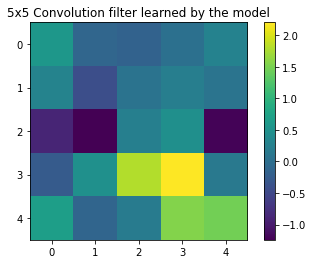

In [ ]:
plt.imshow(conv) # Let's plot 
plt.colorbar()
plt.title("5x5 Convolution filter learned by the model")

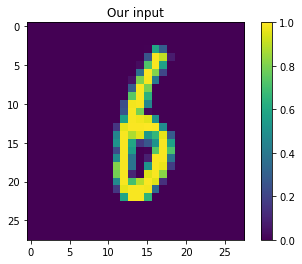

In [ ]:

#first[0][0] is the first image from the first batch
first[0][1].shape # Change the second value to change the example
first_ndarray = first[0][1].squeeze().numpy()
# numpy() function is the converter form torch.Tensor to numpy array.
plt.title("Our input")
plt.imshow(first_ndarray)
plt.colorbar()

In [ ]:
# Here we retrieve the output of the convolution layer from the input 
out_conv = net.conv1(input1).reshape(24,24).detach().numpy()

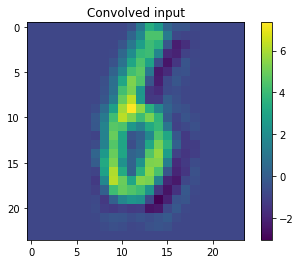

In [ ]:
plt.title("Convolved input")
plt.imshow(out_conv)
plt.colorbar()

## Questions to participants : 

What is the effect of convolution in your opinion ? How could that help ? 

(Answer -> improve contrast, more distinctions between borders = better prediction)

# <span style="color:red"> ADDING IMAGE SHOWING HOW THE WEIGHTS ARE DISTRIBUTED RELATING TO CLASS </span>

In [ ]:
# Here we retrieve the weights of the Dense layer (related to the right class)
right_class = first[1][1].item() # Change the second value to change the example
w = net.dense1.weight[right_class].reshape(24,24).detach().numpy()

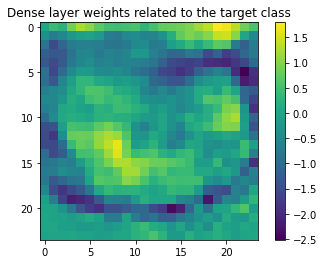

In [ ]:
plt.title("Dense layer weights related to the target class")
plt.imshow(w)
plt.colorbar()

## Question to participants : 

Do you see that the model is learning the right thing ? (i.e : does this look like the right class?)

(Answer -> depends on example, don't hesitate to let participants try other examples) 

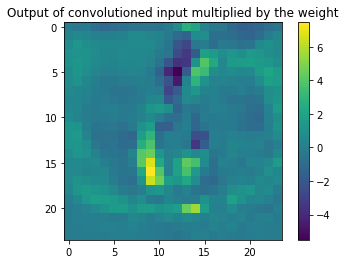

In [ ]:
plt.title("Output of convolutioned input multiplied by the weight")
plt.imshow((out_conv*w))
plt.colorbar()

# **Integrated Gradients** : simple, yet powerful explainability method

*What is it?*

Integrated Gradients is an axiomatic model interpretability algorithm that assigns an importance score to each input feature by approximating the integral of gradients of the model’s output with respect to the inputs along the path (straight line) from given baselines / references to inputs.

source: https://captum.ai/api/integrated_gradients.html


The integral of integrated gradients can be efficiently approximated via a summation. We simply sum the gradients at points occurring at
sufficiently small intervals along the straightline path from
the baseline x' to the input x.

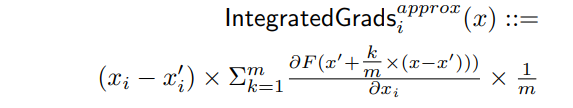

https://arxiv.org/pdf/1703.01365.pdf


*Why is Integrated Gradients superior to other interpretability techniques?*

-> it satisfies the two axioms **(Sensitivity and Implementation Invariance)**  that every attribution method must satisfy, but most known methods don't

-> it requires no modification to the original network

-> extraordinarily simple to implement

-> can be used to debug networks, extract rules from a network and enable the users of the network to engage beter with the model


For an easy-to-follow introduction to this topic, please read https://towardsdatascience.com/understanding-deep-learning-models-with-integrated-gradients-24ddce643dbf




Now, we'll prepare the right environment for implementing the Integrated Gradients method, using **Captum**, an open source, extensible library for model interpretability built on PyTorch. 

https://captum.ai/docs/introduction.html

### Let's implement it using the *Captum* library

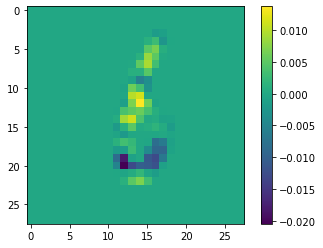

In [ ]:
import captum.attr as attr

input1.require_grad = True
baseline = torch.zeros(tuple(input1.size()))

# create an instance of my Integrated Gradients algorithm by passing the forward function of our model (net)
ig = attr.IntegratedGradients(net)

# to compute the attributions we are calling the attribute method on the ig object that we have created above
# by passing the input and a target index we would like to attribute to
attributions = ig.attribute(input1, target = 8)
new_attributions = attributions.reshape(tuple(input1.squeeze().size()))
plt.imshow(new_attributions)
plt.colorbar()


# <span style="color:red"> ADD MORE INFORMATION ABOUT ATTRIBUTIONS </span>

## Question to participants : 

How do integrated gradients compare with looking at the weights ? What are the similarities ? The differences ? Can you explain them ? 

Answer -> integrated gradients looks at differences from a baseline, looks only at one example (doesn't generalize), takes into account bias (not only weights) which our weights analysis method doesn't do.

However I.G. generalizes to more complicated models, weights analysis doesn't. 